**Customer Segment analysis**

**Importing libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

**1.Download the data set**

**2.Load the dataset**

In [3]:
dataframe =pd.read_csv("Mall_Customers.csv")
dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**3.Perform Below Virtualisation**

**Univariate analysis**

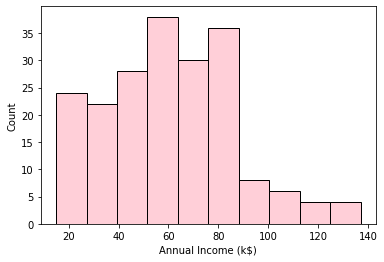

In [5]:
sb.histplot(dataframe['Annual Income (k$)'], color="pink")

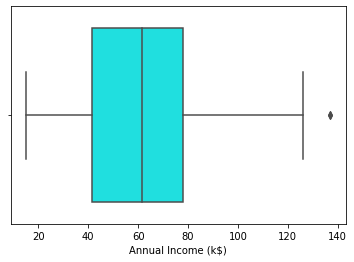

In [8]:
sb.boxplot(dataframe['Annual Income (k$)'], color="aqua")

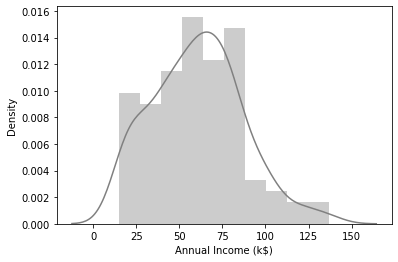

In [13]:
sb.distplot(dataframe['Annual Income (k$)'], color="grey")

**Bivariate analysis**

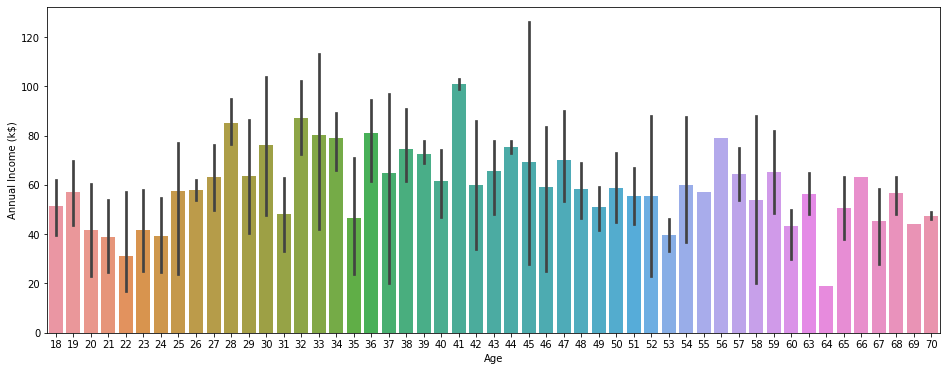

In [15]:
plt.figure(figsize=(16,6))
sb.barplot(dataframe['Age'],dataframe['Annual Income (k$)'])

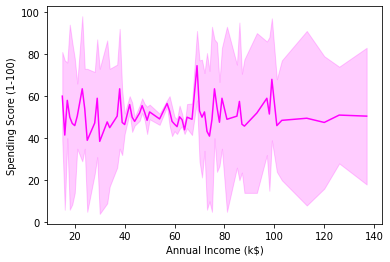

In [18]:
sb.lineplot(dataframe['Annual Income (k$)'], dataframe['Spending Score (1-100)'], color="magenta")

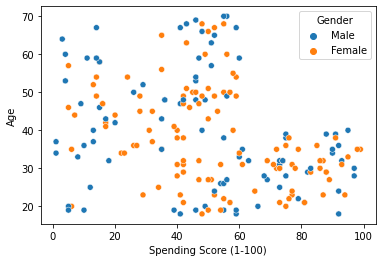

In [19]:
import seaborn as sns
sb.scatterplot(dataframe['Spending Score (1-100)'], dataframe['Age'], hue = dataframe['Gender'])

**Gender Vs Age**

ValueError: ignored

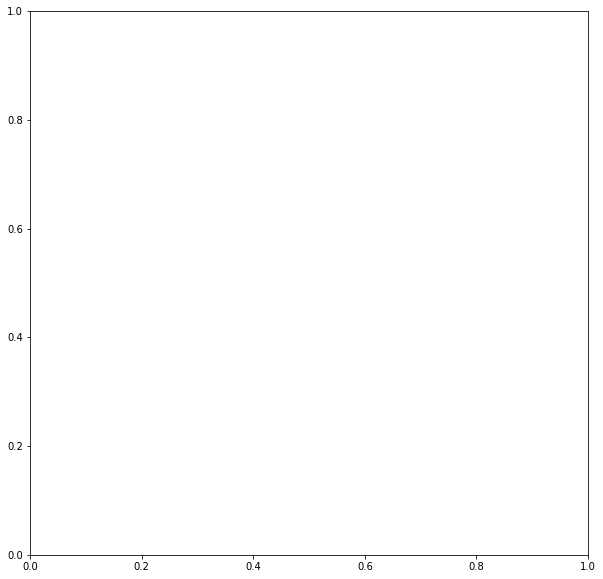

In [27]:
temp = pd.concat([dataframe['Age'], dataframe['Gender']], axis=1)

f, ax = plt.subplots(figsize=(10,10))
fig = sb.boxenplot(x='Gender', y="Age", dataframe=dataframe)
fig.axis(ymin=0, ymax=100);

**Annual Income Vs Gender**

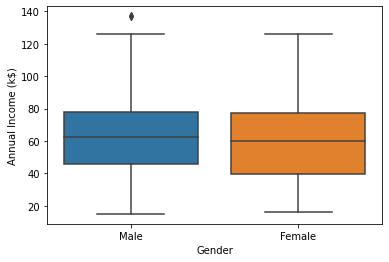

In [28]:
sb.boxplot(x=dataframe['Gender'],y=dataframe['Annual Income (k$)'])

**Multivariate Analysis**

Correlation between the different attributes

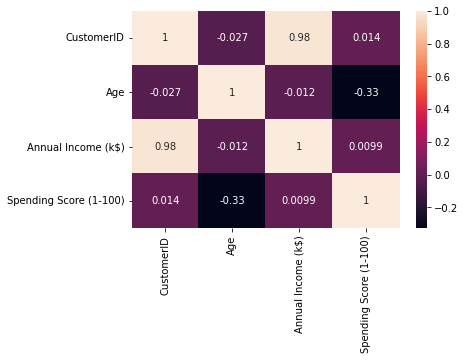

In [29]:
sb.heatmap(dataframe.corr(),annot=True)

**4.Perform Descriptive Stats on the Dataset**

In [30]:
dataframe.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
dataframe.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [32]:
dataframe.shape

(200, 5)

**5.Check the missing values and deal with them**

In [33]:
dataframe.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [34]:
dataframe.drop('CustomerID',axis=1,inplace=True)
dataframe.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**6.Find the outliers and replace them**

In [35]:
data=dataframe
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1f249232d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1f24923d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1f2491ad50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1f24929850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1f24929d90>],
 'means': []}

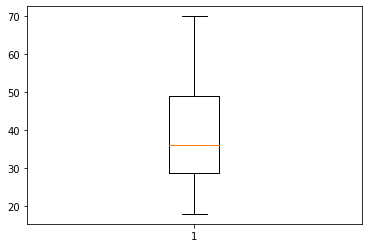

In [36]:
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1f2490c410>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1f2490ce90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1f24904e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1f24914990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1f24914ed0>],
 'means': []}

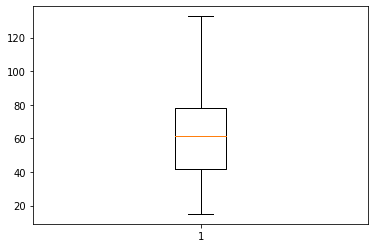

In [37]:
plt.boxplot(data['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1f2483b6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1f24841190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1f2483b190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1f24841c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1f248491d0>],
 'means': []}

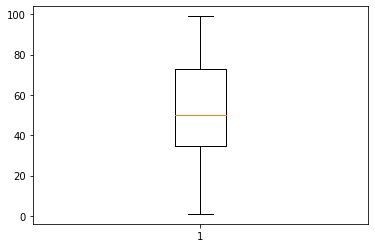

In [38]:
plt.boxplot(data['Spending Score (1-100)'])

**7.Check the Categorial columns and perform encoding**

In [39]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [41]:
data['Gender'] = l_en.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


**8.Scaling the data**

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

**9.Perform any of the clustering algorithms**

In [43]:
from sklearn.cluster import KMeans
km = KMeans()
result = km.fit_predict(data_scaled)
result

array([3, 3, 7, 7, 7, 7, 0, 7, 4, 7, 4, 7, 0, 7, 6, 3, 7, 3, 4, 7, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 7, 4, 7, 4, 3, 0, 7, 0, 7, 0, 7, 0, 3, 4, 7,
       0, 7, 0, 7, 7, 7, 0, 3, 7, 4, 0, 4, 0, 4, 7, 4, 4, 3, 0, 0, 4, 3,
       0, 0, 3, 7, 4, 0, 0, 0, 4, 3, 0, 3, 7, 0, 4, 3, 4, 0, 7, 4, 0, 7,
       7, 0, 0, 3, 4, 0, 7, 3, 0, 7, 4, 3, 7, 0, 4, 3, 4, 7, 0, 4, 4, 4,
       4, 7, 2, 3, 7, 7, 0, 0, 0, 0, 3, 2, 5, 1, 2, 5, 6, 1, 4, 1, 6, 1,
       2, 5, 6, 5, 2, 1, 6, 5, 2, 1, 2, 5, 6, 1, 6, 5, 2, 1, 6, 1, 2, 5,
       2, 5, 6, 5, 6, 5, 0, 5, 6, 5, 6, 5, 6, 5, 2, 1, 6, 1, 6, 1, 2, 5,
       6, 1, 6, 1, 2, 5, 6, 5, 2, 1, 2, 1, 2, 5, 2, 5, 6, 5, 2, 5, 2, 1,
       6, 1], dtype=int32)

In [44]:
dataframe1 = pd.DataFrame(data_scaled, columns = data.columns)
dataframe1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [46]:
dataframe1['kclus']  = pd.Series(result)
dataframe1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,3
1,1.0,0.057692,0.000000,0.816327,3
2,0.0,0.038462,0.008493,0.051020,7
3,0.0,0.096154,0.008493,0.775510,7
4,0.0,0.250000,0.016985,0.397959,7


In [47]:
dataframe1['kclus'].unique()

array([3, 7, 0, 4, 6, 2, 5, 1], dtype=int32)

In [48]:
dataframe1['kclus'].value_counts()

0    37
7    34
4    26
3    24
5    22
6    20
2    19
1    18
Name: kclus, dtype: int64

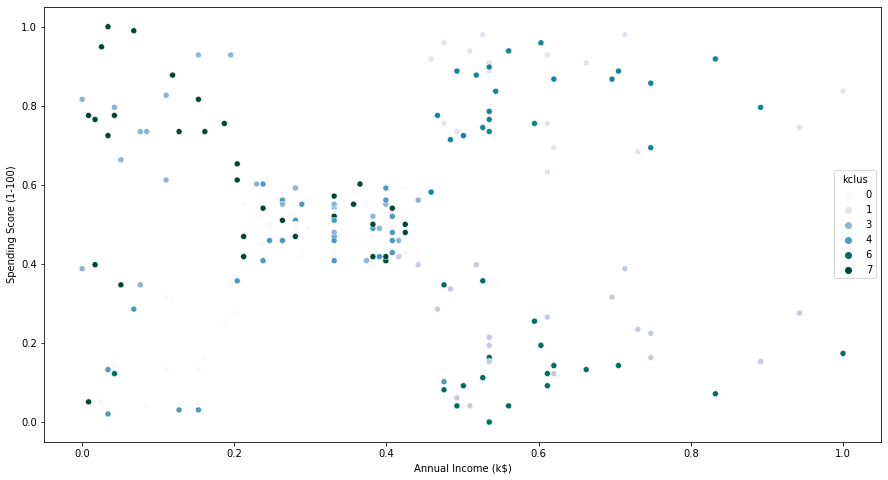

In [50]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=dataframe1['Annual Income (k$)'],
                y=dataframe1['Spending Score (1-100)'],
                hue=dataframe1['kclus'],
                palette='PuBuGn')
plt.show()

In [51]:
ind = dataframe1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [52]:
dep = dataframe1.iloc[:,4:]
dep.head()

,kclus
0,3
1,3
2,7
3,7
4,7


splitting into train and test data

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [54]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [55]:
y_train.head()

,kclus
116,0
67,0
78,7
42,4
17,3


In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [57]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[4.12791771],
       [1.52050942],
       [2.9551109 ],
       [1.40820442],
       [3.26284819]])

Measure the perormance using metrices

In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  5.651670104266117
The Root mean squared error is:  2.3773241479163327
The Mean absolute error is:  2.209187272398245
The accuracy is:  0.16679584031459016
